In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import missingno 
from sklearn.metrics import plot_roc_curve
from numpy.random import normal
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from scipy import stats
from scipy.stats import jarque_bera
from scipy.stats import anderson
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score

#### Description of variables 

1. age - age in years

2. sex - sex (1 = male; 0 = female)

3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)

5. chol - serum cholestoral in mg/dl

6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7. restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest

11. slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

12. ca - number of major vessels (0-3) colored by flourosopy

13. thal - 2 = normal; 1 = fixed defect; 3 = reversable defect

14. num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)

In [220]:
df = pd.read_csv("heart.csv")
print(np.size(df))

4242


In [221]:
print("Data of the dataset:", df.shape)

Data of the dataset: (303, 14)


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### initia analysis of the dataset 

In [223]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [224]:
new_columns = ["age","sex","cp","trtbps","chol","fbs","rest_ecg","thalach","exang","oldpeak","sloope","ca","thal","target"]

In [225]:
df.columns = new_columns

In [226]:
df.head()

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  sloope  \
0   63    1   3     145   233    1         0      150      0      2.3       0   
1   37    1   2     130   250    0         1      187      0      3.5       0   
2   41    0   1     130   204    0         0      172      0      1.4       2   
3   56    1   1     120   236    0         1      178      0      0.8       2   
4   57    0   0     120   354    0         1      163      1      0.6       2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [227]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (303, 14)


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  sloope    303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Examining Missing Values 

In [229]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
sloope      0
ca          0
thal        0
target      0
dtype: int64

So there is no missing value 

In [230]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
pd.DataFrame(isnull_number, index = df.columns, columns = ['Total missing values'])

Total missing values
age                          0
sex                          0
cp                           0
trtbps                       0
chol                         0
fbs                          0
rest_ecg                     0
thalach                      0
exang                        0
oldpeak                      0
sloope                       0
ca                           0
thal                         0
target                       0

<AxesSubplot:>

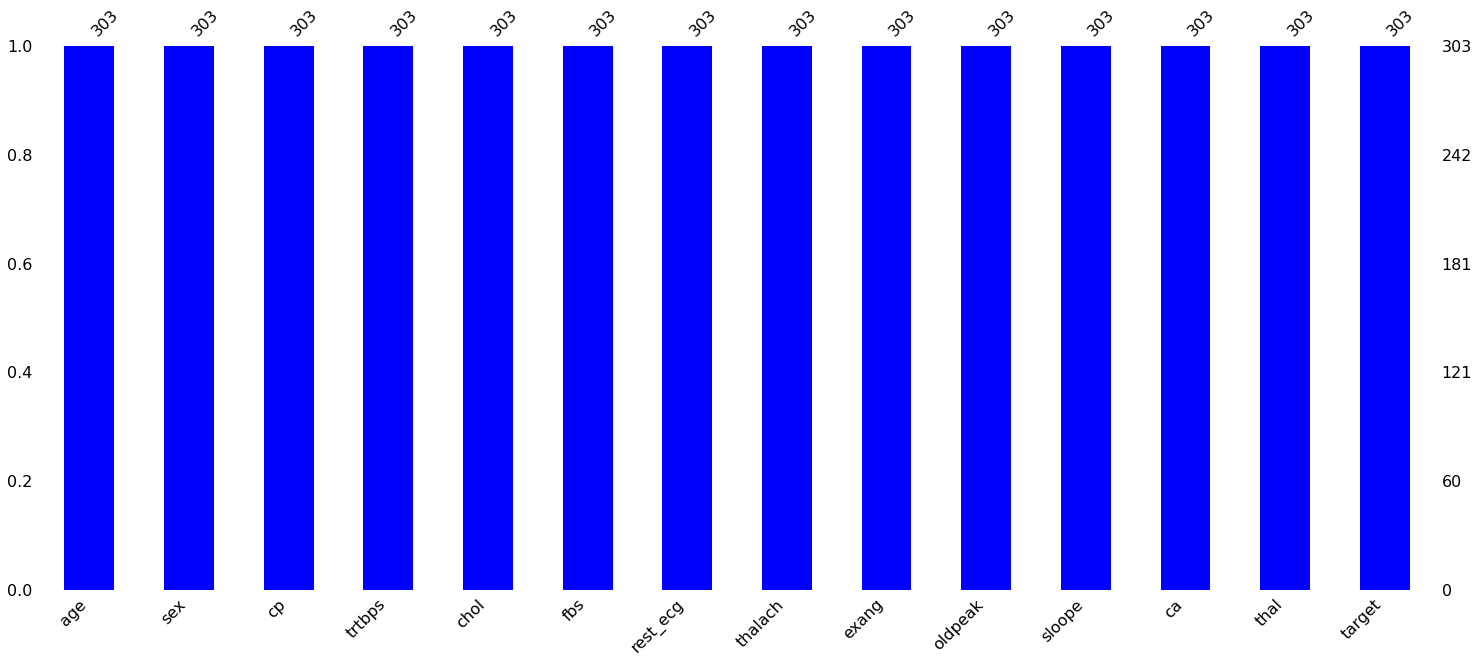

In [231]:
missingno.bar(df, color = 'b')

Any missing value 

#### Examing Unique Value 

In [232]:
df.head()

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  sloope  \
0   63    1   3     145   233    1         0      150      0      2.3       0   
1   37    1   2     130   250    0         1      187      0      3.5       0   
2   41    0   1     130   204    0         0      172      0      1.4       2   
3   56    1   1     120   236    0         1      178      0      0.8       2   
4   57    0   0     120   354    0         1      163      1      0.6       2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [233]:
df["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [234]:
df["cp"].value_counts().count()

4

In [235]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)
pd.DataFrame(unique_number, index = df.columns, columns = ['Total unique values'])

Total unique values
age                        41
sex                         2
cp                          4
trtbps                     49
chol                      152
fbs                         2
rest_ecg                    3
thalach                    91
exang                       2
oldpeak                    40
sloope                      3
ca                          5
thal                        4
target                      2

#### Separation variables (Numeric or Categorical)

In [236]:
df.head()

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  sloope  \
0   63    1   3     145   233    1         0      150      0      2.3       0   
1   37    1   2     130   250    0         1      187      0      3.5       0   
2   41    0   1     130   204    0         0      172      0      1.4       2   
3   56    1   1     120   236    0         1      178      0      0.8       2   
4   57    0   0     120   354    0         1      163      1      0.6       2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [237]:
numeric_var = ['age','trtbps','chol','thalach','oldpeak']
categoric_var = ['sex','cp','fbs','rest_ecg','exang','sloope','thal','target'] #,'ca'

#### Examing Statistics of Variables 

In [238]:
round(df[numeric_var].describe(),2)

age  trtbps    chol  thalach  oldpeak
count  303.00  303.00  303.00   303.00   303.00
mean    54.37  131.62  246.26   149.65     1.04
std      9.08   17.54   51.83    22.91     1.16
min     29.00   94.00  126.00    71.00     0.00
25%     47.50  120.00  211.00   133.50     0.00
50%     55.00  130.00  240.00   153.00     0.80
75%     61.00  140.00  274.50   166.00     1.60
max     77.00  200.00  564.00   202.00     6.20

In [239]:
sns.distplot(df["age"],hist_kws = dict(linewidth = 1, edgecolor = "k"))

<AxesSubplot:xlabel='age'>

<AxesSubplot:xlabel='trtbps'>

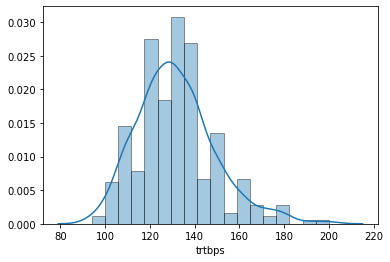

In [240]:
sns.distplot(df["trtbps"],hist_kws = dict(linewidth = 1, edgecolor = "k"))

<AxesSubplot:xlabel='chol'>

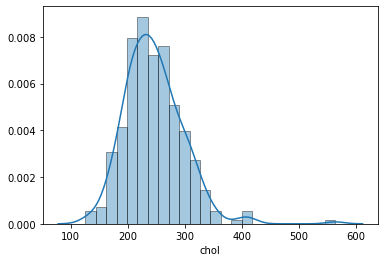

In [241]:
sns.distplot(df["chol"],hist_kws = dict(linewidth = 1, edgecolor = "k"))

<AxesSubplot:xlabel='chol'>

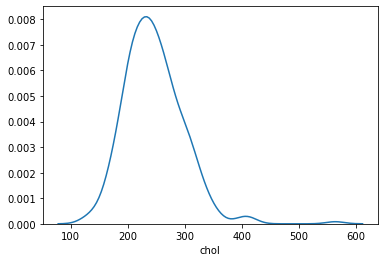

In [242]:
sns.distplot(df['chol'], hist = False)

#### Exploratory data analysis (numerical varables (analysis with distplot))

In [243]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [244]:
numeric_axis_name = ["Age of the patient", "Resting blood pressure","Cholesterol","Maximum Heart Rate Achieved","ST Depresion"]

In [245]:
list(zip(numeric_var, numeric_axis_name))

[('age', 'Age of the patient'),
 ('trtbps', 'Resting blood pressure'),
 ('chol', 'Cholesterol'),
 ('thalach', 'Maximum Heart Rate Achieved'),
 ('oldpeak', 'ST Depresion')]

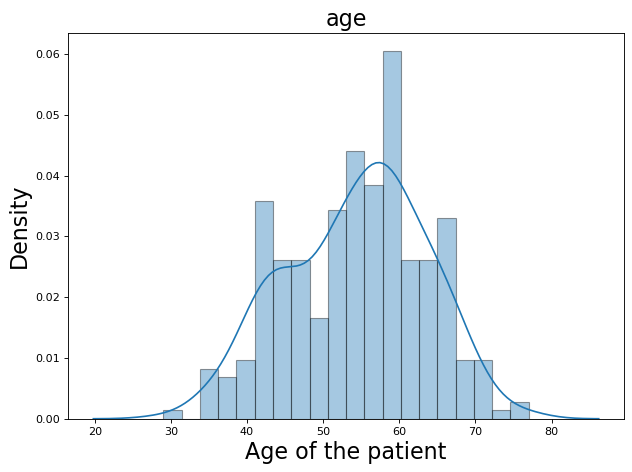

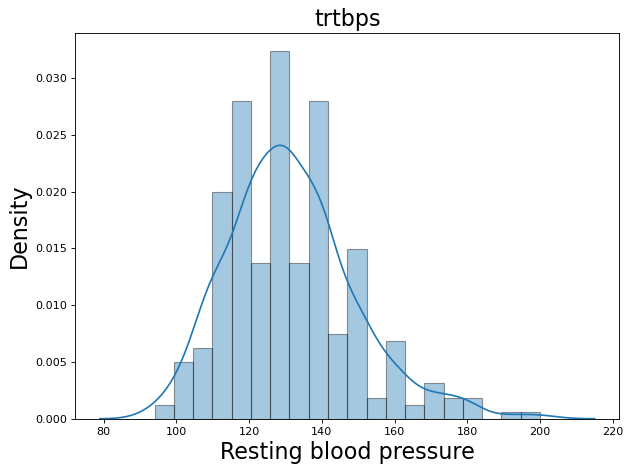

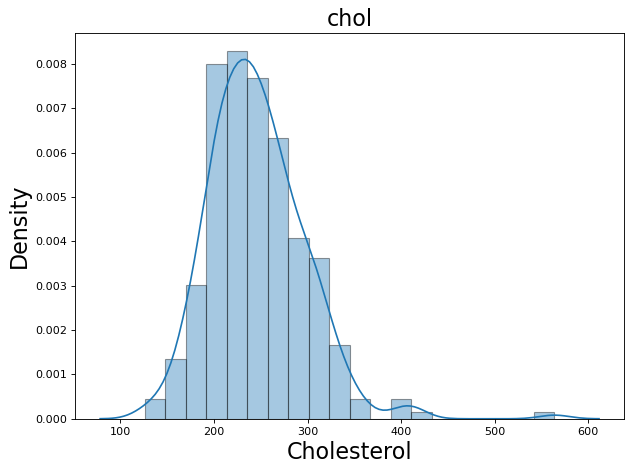

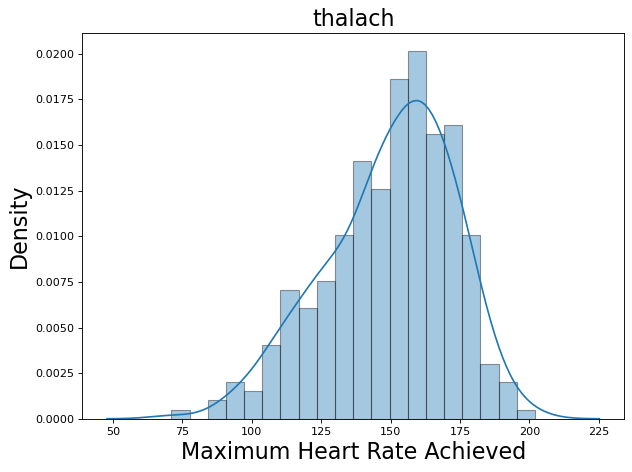

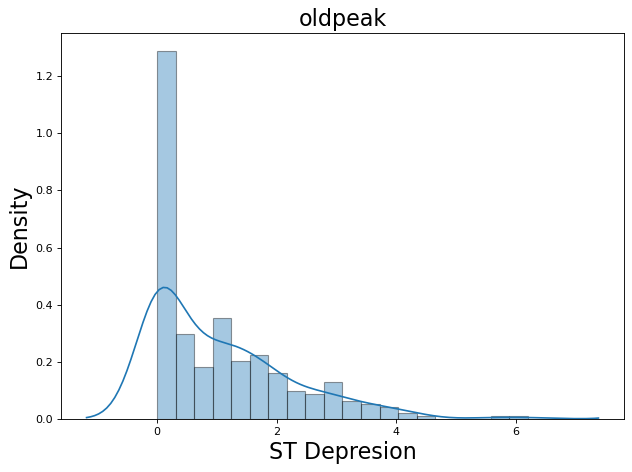

In [246]:
for i,z in list(zip(numeric_var, numeric_axis_name)):
    plt.figure(figsize = (8,6), dpi = 80)
    sns.distplot(df[i],hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)
    plt.title(i,fontsize = 20)
    plt.xlabel(z,fontsize = 20)
    plt.ylabel('Density',fontsize = 20)
    plt.tight_layout()
    #plt.savefig("C:\\Users\\nadia\\Desktop\\magisterka\\exploratory_data_analysis\\" + i+"_num"+".pdf")
    plt.show()

## whether the data has heavy tails

In [247]:
def mu_sigma(x):
    mu = np.mean(x)
    sigma = np.std(x)
    return mu, sigma

In [248]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

### Age

In [249]:
ecdf_age = ecdf(df["age"])

In [250]:
[mu, sigma] = mu_sigma(df["age"])

In [251]:
sample = normal(loc=mu, scale=sigma, size=len(df["age"]))

In [252]:
ecdf_normal =ecdf(sample)

<Figure size 432x288 with 0 Axes>

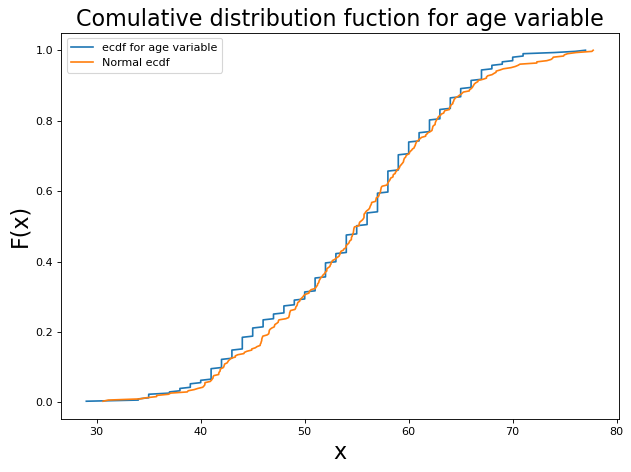

In [253]:
plt.figure()
plt.figure(figsize = (8,6), dpi = 80)
plt.plot(ecdf_age[0],ecdf_age[1])
plt.plot(ecdf_normal[0],ecdf_normal[1])
plt.xlabel("x",fontsize = 20)
plt.ylabel("F(x)",fontsize = 20)
plt.title("Comulative distribution fuction for age variable",fontsize = 20)
plt.legend(["ecdf for age variable","Normal ecdf"])
plt.tight_layout()
#plt.savefig("C:\\Users\\nadia\\Desktop\\magisterka\\exploratory_data_analysis\\tails\\" + "Age_ecdf.pdf")
plt.show()


In [254]:
tail_age_log = np.log(1 - ecdf_age[1])
tail_normal_log = np.log(1 - ecdf_normal[1])

<Figure size 432x288 with 0 Axes>

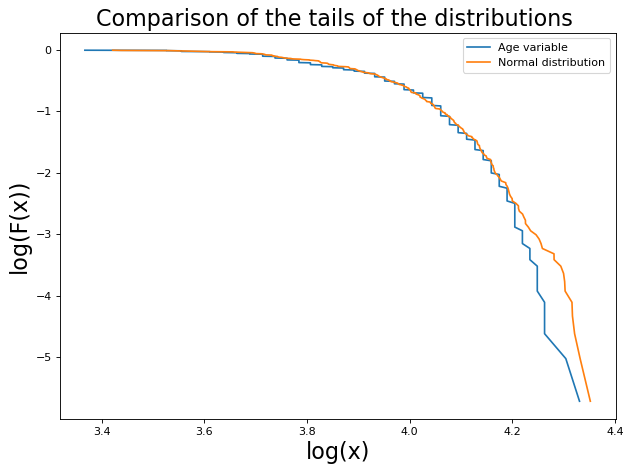

In [255]:
plt.figure()
plt.figure(figsize = (8,6), dpi = 80)
plt.plot(np.log(ecdf_age[0]),tail_age_log)
plt.plot(np.log(ecdf_normal[0]),tail_normal_log)
plt.xlabel("log(x)",fontsize = 20)
plt.ylabel("log(F(x))",fontsize = 20)
plt.title("Comparison of the tails of the distributions ",fontsize = 20)
plt.legend(["Age variable","Normal distribution"])
plt.tight_layout()
#plt.savefig("C:\\Users\\nadia\\Desktop\\magisterka\\exploratory_data_analysis\\tails\\" + "Age_tails.pdf")
plt.show()

In [256]:
ksTest = stats.ks_2samp(df["age"], sample)
ksTest

KstestResult(statistic=0.0594059405940594, pvalue=0.6597219970167143)

In [257]:
result = (jarque_bera(df['age']))

print(f"JB statistic: {result[0]}")
print(f"p-value: {result[1]}")

JB statistic: 5.9104120157420095
p-value: 0.0520679330669892


In [258]:
result = anderson(df['age'])

# statistics value
ad_statistic = result.statistic

# Table of critical values for different levels of significance
critical_values = result.critical_values

# Calculation of p-value
p_value = np.interp(ad_statistic, critical_values, [0.1, 0.05, 0.025, 0.01, 0.005])

print('Statistics:', ad_statistic)
print('p-value:', p_value)

Statistics: 1.513876116985898
p-value: 0.005


### Resting blood pressure

In [259]:
ecdf_trtbps = ecdf(df["trtbps"])

In [260]:
[mu, sigma] = mu_sigma(df["trtbps"])
sample = normal(loc=mu, scale=sigma, size=len(df["trtbps"]))
ecdf_normal =ecdf(sample)

<Figure size 432x288 with 0 Axes>

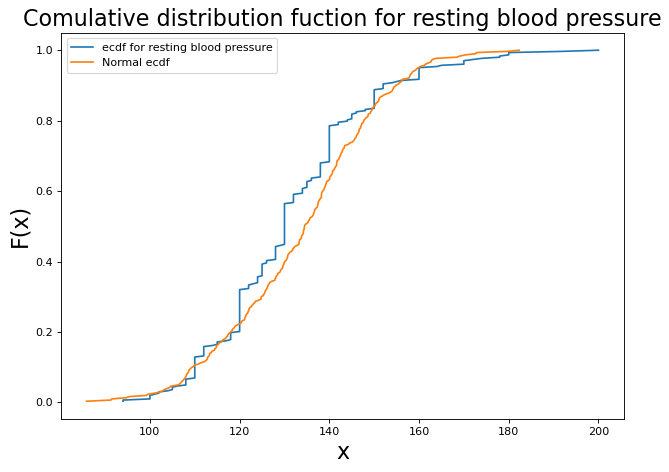

In [261]:
plt.figure()
plt.figure(figsize = (8,6), dpi = 80)
plt.plot(ecdf_trtbps[0],ecdf_trtbps[1])
plt.plot(ecdf_normal[0],ecdf_normal[1])
plt.xlabel("x", fontsize = 20)
plt.ylabel("F(x)", fontsize = 20)
plt.title("Comulative distribution fuction for resting blood pressure", fontsize = 20)
plt.legend(["ecdf for resting blood pressure","Normal ecdf"])
plt.tight_layout()
#plt.savefig("C:\\Users\\nadia\\Desktop\\magisterka\\exploratory_data_analysis\\tails\\" + "trtbps_ecdf.pdf")
plt.show()

In [262]:
tail_trtbps_log = np.log(1 - ecdf_trtbps[1])
tail_normal_log = np.log(1 - ecdf_normal[1])

<Figure size 432x288 with 0 Axes>

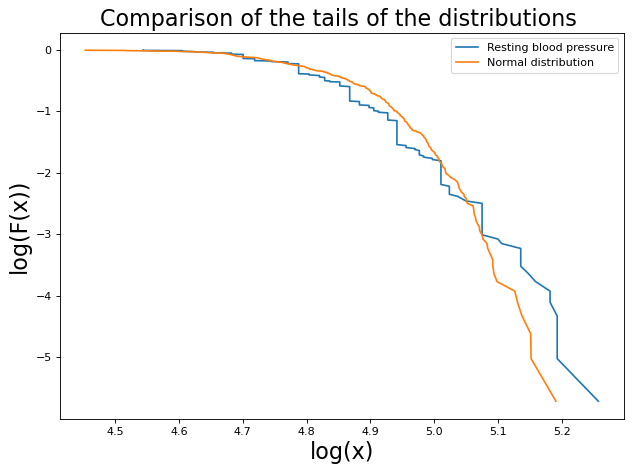

In [263]:
plt.figure()
plt.figure(figsize = (8,6), dpi = 80)
plt.plot(np.log(ecdf_trtbps[0]),tail_trtbps_log)
plt.plot(np.log(ecdf_normal[0]),tail_normal_log)
plt.xlabel("log(x)", fontsize = 20)
plt.ylabel("log(F(x))",fontsize = 20)
plt.title("Comparison of the tails of the distributions ", fontsize = 20)
plt.legend(["Resting blood pressure","Normal distribution"])
plt.tight_layout()
#plt.savefig("C:\\Users\\nadia\\Desktop\\magisterka\\exploratory_data_analysis\\tails\\" + "trtbps_tails.pdf")
plt.show()

In [264]:
ksTest = stats.ks_2samp(df["trtbps"], sample)
ksTest

KstestResult(statistic=0.16501650165016502, pvalue=0.0005096691383540249)

In [265]:
result = (jarque_bera(df['trtbps']))

print(f"JB statistic: {result[0]}")
print(f"p-value: {result[1]}")

JB statistic: 35.56519053640657
p-value: 1.8928534961659693e-08


In [266]:
result = anderson(df['trtbps'])

# statistics value
ad_statistic = result.statistic

# Table of critical values for different levels of significance
critical_values = result.critical_values

# Calculation of p-value
p_value = np.interp(ad_statistic, critical_values, [0.1, 0.05, 0.025, 0.01, 0.005])

print('Statistics:', ad_statistic)
print('p-value:', p_value)

Statistics: 2.5716952861943128
p-value: 0.005


### Serum cholesterol

In [267]:
ecdf_chol = ecdf(df["chol"])
[mu, sigma] = mu_sigma(df["chol"])
sample = normal(loc=mu, scale=sigma, size=len(df["chol"]))
ecdf_normal =ecdf(sample)

<Figure size 432x288 with 0 Axes>

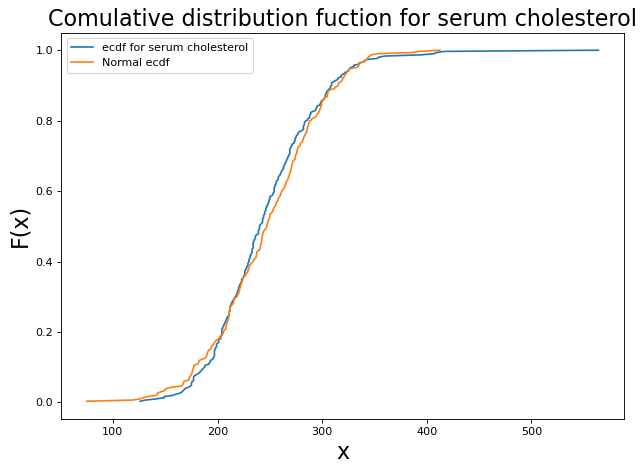

In [268]:
plt.figure()
plt.figure(figsize = (8,6), dpi = 80)
plt.plot(ecdf_chol[0],ecdf_chol[1])
plt.plot(ecdf_normal[0],ecdf_normal[1])
plt.xlabel("x", fontsize = 20)
plt.ylabel("F(x)", fontsize = 20)
plt.title("Comulative distribution fuction for serum cholesterol", fontsize = 20)
plt.legend(["ecdf for serum cholesterol","Normal ecdf"])
plt.tight_layout()
#plt.savefig("C:\\Users\\nadia\\Desktop\\magisterka\\exploratory_data_analysis\\tails\\"+"chol_ecdf.pdf")
plt.show()

In [269]:
tail_chol_log = np.log(1 - ecdf_chol[1])
tail_normal_log = np.log(1 - ecdf_normal[1])

<Figure size 432x288 with 0 Axes>

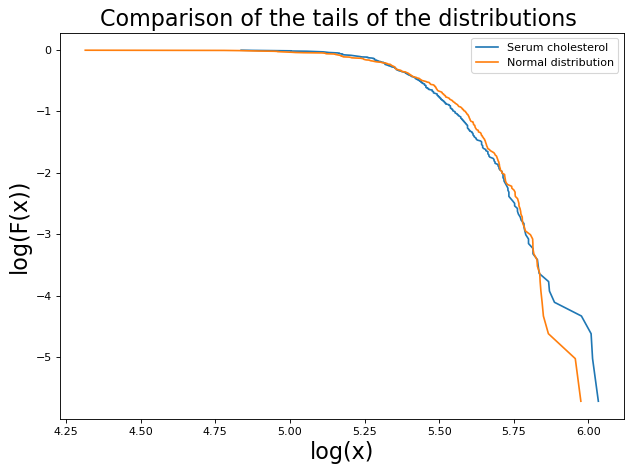

In [270]:
plt.figure()
plt.figure(figsize = (8,6), dpi = 80)
plt.plot(np.log(ecdf_chol[0]),tail_chol_log)
plt.plot(np.log(ecdf_normal[0]),tail_normal_log)
plt.xlabel("log(x)", fontsize = 20)
plt.ylabel("log(F(x))", fontsize = 20)
plt.title("Comparison of the tails of the distributions ", fontsize = 20)
plt.legend(["Serum cholesterol","Normal distribution"])
plt.tight_layout()
#plt.savefig("C:\\Users\\nadia\\Desktop\\magisterka\\exploratory_data_analysis\\tails\\"+"chol_tails.pdf")
plt.show()

In [271]:
ksTest = stats.ks_2samp(df["chol"], sample)
ksTest

KstestResult(statistic=0.07260726072607261, pvalue=0.4020429835885309)

In [272]:
result = (jarque_bera(df['chol']))

print(f"JB statistic: {result[0]}")
print(f"p-value: {result[1]}")

JB statistic: 311.08859979946624
p-value: 0.0


In [273]:
result = anderson(df['chol'])

# statistics value
ad_statistic = result.statistic

# Table of critical values for different levels of significance
critical_values = result.critical_values

# Calculation of p-value
p_value = np.interp(ad_statistic, critical_values, [0.1, 0.05, 0.025, 0.01, 0.005])

print('Statistics:', ad_statistic)
print('p-value:', p_value)

Statistics: 1.7258860627761123
p-value: 0.005


### Maximum heart rate achieved 

In [274]:
ecdf_thalach = ecdf(df["thalach"])
[mu, sigma] = mu_sigma(df["thalach"])
sample = normal(loc=mu, scale=sigma, size=len(df["thalach"]))
ecdf_normal =ecdf(sample)

<Figure size 432x288 with 0 Axes>

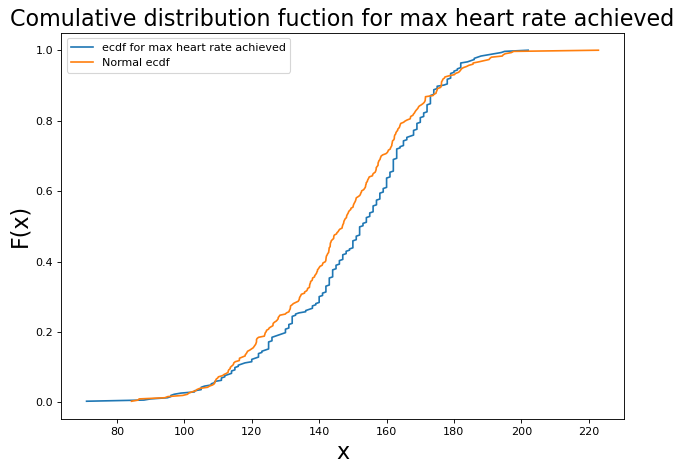

In [275]:
plt.figure()
plt.figure(figsize = (8,6), dpi = 80)
plt.plot(ecdf_thalach[0],ecdf_thalach[1])
plt.plot(ecdf_normal[0],ecdf_normal[1])
plt.xlabel("x", fontsize = 20)
plt.ylabel("F(x)", fontsize = 20)
plt.title("Comulative distribution fuction for max heart rate achieved", fontsize = 20)
plt.legend(["ecdf for max heart rate achieved","Normal ecdf"])
plt.tight_layout()
#plt.savefig("C:\\Users\\nadia\\Desktop\\magisterka\\exploratory_data_analysis\\tails\\" + "thalach_ecdf.pdf")
plt.show()

In [276]:
tail_thalach_log = np.log(1 - ecdf_thalach[1])
tail_normal_log = np.log(1 - ecdf_normal[1])

<Figure size 432x288 with 0 Axes>

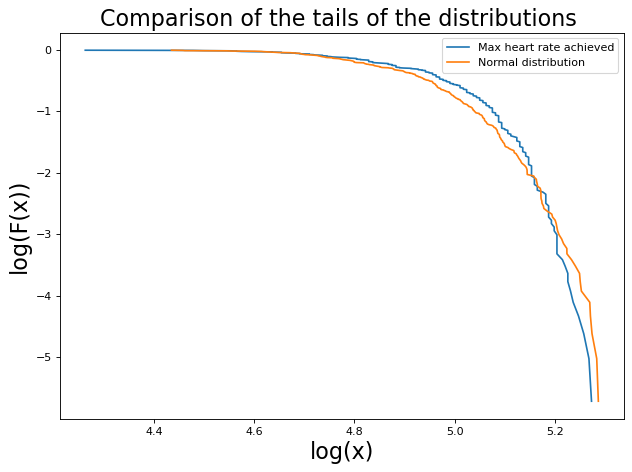

In [277]:
plt.figure()
plt.figure(figsize = (8,6), dpi = 80)
plt.plot(np.log(ecdf_thalach[0]),tail_thalach_log)
plt.plot(np.log(ecdf_normal[0]),tail_normal_log)
plt.xlabel("log(x)", fontsize = 20)
plt.ylabel("log(F(x))", fontsize = 20)
plt.title("Comparison of the tails of the distributions ", fontsize = 20)
plt.legend(["Max heart rate achieved","Normal distribution"])
plt.tight_layout()
#plt.savefig("C:\\Users\\nadia\\Desktop\\magisterka\\exploratory_data_analysis\\tails\\" + "thalach_tails.pdf")
plt.show()

In [278]:
ksTest = stats.ks_2samp(df["thalach"], sample)
ksTest

KstestResult(statistic=0.1188118811881188, pvalue=0.027678407812131184)

In [279]:
result = (jarque_bera(df['thalach']))

print(f"JB statistic: {result[0]}")
print(f"p-value: {result[1]}")

JB statistic: 14.522813656458656
p-value: 0.0007021195788311507


In [280]:
result = anderson(df['thalach'])

# statistics value
ad_statistic = result.statistic

# Table of critical values for different levels of significance
critical_values = result.critical_values

# Calculation of p-value
p_value = np.interp(ad_statistic, critical_values, [0.1, 0.05, 0.025, 0.01, 0.005])

print('Statistics:', ad_statistic)
print('p-value:', p_value)

Statistics: 2.3190095481540993
p-value: 0.005


### ST depression induced by exercise relative to rest

In [281]:
ecdf_oldpeak = ecdf(df["oldpeak"])
[mu, sigma] = mu_sigma(df["oldpeak"])
sample = normal(loc=mu, scale=sigma, size=len(df["oldpeak"]))
ecdf_normal =ecdf(sample)

<Figure size 432x288 with 0 Axes>

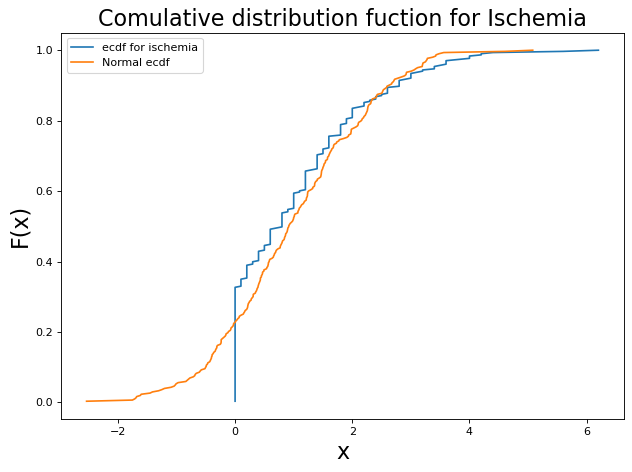

In [282]:
plt.figure()
plt.figure(figsize = (8,6), dpi = 80)
plt.plot(ecdf_oldpeak[0],ecdf_oldpeak[1])
plt.plot(ecdf_normal[0],ecdf_normal[1])
plt.xlabel("x", fontsize = 20)
plt.ylabel("F(x)", fontsize = 20)
plt.title("Comulative distribution fuction for Ischemia", fontsize = 20)
plt.legend(["ecdf for ischemia","Normal ecdf"])
plt.tight_layout()
plt.savefig("C:\\Users\\nadia\\Desktop\\magisterka\\exploratory_data_analysis\\tails\\" + "oldpeak_ecdf.pdf")
plt.show()

In [283]:
tail_oldpeak_log = np.log(1 - ecdf_oldpeak[1])
tail_normal_log = np.log(1 - ecdf_normal[1])

<Figure size 432x288 with 0 Axes>

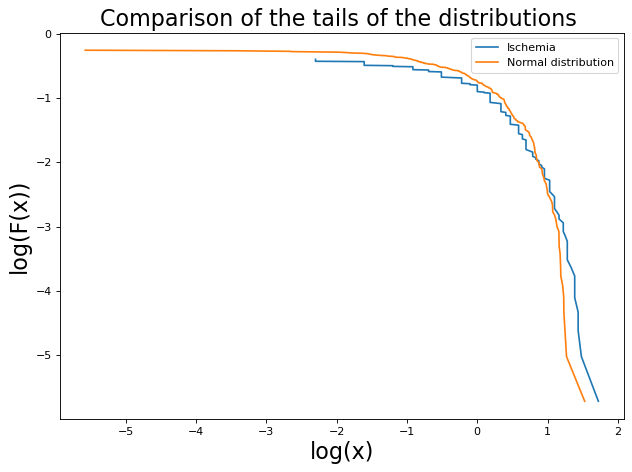

In [284]:
plt.figure()
plt.figure(figsize = (8,6), dpi = 80)
plt.plot(np.log(ecdf_oldpeak[0]),tail_oldpeak_log)
plt.plot(np.log(ecdf_normal[0]),tail_normal_log)
plt.xlabel("log(x)", fontsize = 20)
plt.ylabel("log(F(x))", fontsize = 20)
plt.title("Comparison of the tails of the distributions ", fontsize = 20)
plt.legend(["Ischemia","Normal distribution"])
plt.tight_layout()
plt.savefig("C:\\Users\\nadia\\Desktop\\magisterka\\exploratory_data_analysis\\tails\\" + "oldpeak_tails.pdf")
plt.show()

In [285]:
ksTest = stats.ks_2samp(df["oldpeak"], sample)
ksTest

KstestResult(statistic=0.22442244224422442, pvalue=4.2442781707983933e-07)

In [286]:
result = (jarque_bera(df['oldpeak']))

print(f"JB statistic: {result[0]}")
print(f"p-value: {result[1]}")

JB statistic: 110.17162771033018
p-value: 0.0


In [287]:
result = anderson(df['oldpeak'])

# statistics value
ad_statistic = result.statistic

# Table of critical values for different levels of significance
critical_values = result.critical_values

# Calculation of p-value
p_value = np.interp(ad_statistic, critical_values, [0.1, 0.05, 0.025, 0.01, 0.005])

print('Statistics:', ad_statistic)
print('p-value:', p_value)

Statistics: 14.170665510451784
p-value: 0.005


### Categorical Variables (Analysis with Pie Chart)

In [288]:
categoric_var 

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'sloope', 'thal', 'target']

In [289]:
categoric_axis_name = ["Gender","Chest Pain Type","Fasting Blood sugar","Resting Electrocardiographic Results",
                      "Exercise Induced Angina","The Slope of ST Segment","Type of Defect","Target"] #"Number of Major Vessels",

In [290]:
list(zip(categoric_var, categoric_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood sugar'),
 ('rest_ecg', 'Resting Electrocardiographic Results'),
 ('exang', 'Exercise Induced Angina'),
 ('sloope', 'The Slope of ST Segment'),
 ('thal', 'Type of Defect'),
 ('target', 'Target')]

In [291]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

### Examing the missing data according to the Analysis Result

In [292]:
df[df['thal'] == 0] #because 0 means null 

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  \
48    53    0   2     128   216    0         0      115      0      0.0   
281   52    1   0     128   204    1         1      156      1      1.0   

     sloope  ca  thal  target  
48        2   0     0       1  
281       1   0     0       0

In [293]:
df["thal"]=df["thal"].replace(0, np.nan)

In [294]:
df.loc[[48,281], :]

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  \
48    53    0   2     128   216    0         0      115      0      0.0   
281   52    1   0     128   204    1         1      156      1      1.0   

     sloope  ca  thal  target  
48        2   0   NaN       1  
281       1   0   NaN       0

In [295]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
pd.DataFrame(isnull_number,  index = df.columns, columns=["Total Missing Values"])

Total Missing Values
age                          0
sex                          0
cp                           0
trtbps                       0
chol                         0
fbs                          0
rest_ecg                     0
thalach                      0
exang                        0
oldpeak                      0
sloope                       0
ca                           0
thal                         2
target                       0

In [296]:
# fill in the values that are missing as 2 i.e. normal
df["thal"].fillna(2, inplace = True)

In [297]:
df.loc[[48,281],:]

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  \
48    53    0   2     128   216    0         0      115      0      0.0   
281   52    1   0     128   204    1         1      156      1      1.0   

     sloope  ca  thal  target  
48        2   0   2.0       1  
281       1   0   2.0       0

In [298]:
df

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  \
0     63    1   3     145   233    1         0      150      0      2.3   
1     37    1   2     130   250    0         1      187      0      3.5   
2     41    0   1     130   204    0         0      172      0      1.4   
3     56    1   1     120   236    0         1      178      0      0.8   
4     57    0   0     120   354    0         1      163      1      0.6   
..   ...  ...  ..     ...   ...  ...       ...      ...    ...      ...   
298   57    0   0     140   241    0         1      123      1      0.2   
299   45    1   3     110   264    0         1      132      0      1.2   
300   68    1   0     144   193    1         1      141      0      3.4   
301   57    1   0     130   131    0         1      115      1      1.2   
302   57    0   1     130   236    0         0      174      0      0.0   

     sloope  ca  thal  target  
0         0   0   1.0       1  
1         0   0   2.0       1  
2         2   0   2.0       1  
3         2   0   2.0       1  
4         2   0   2.0       1  
..      ...  ..   ...     ...  
298       1   0   3.0       0  
299       1   0   3.0       0  
300       1   2   3.0       0  
301       1   1   3.0       0  
302       1   1   2.0       0  

[303 rows x 14 columns]

In [299]:
df['thal'] = pd.to_numeric(df['thal'], downcast = 'integer')

In [300]:
df.loc[[48,281],:]

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  \
48    53    0   2     128   216    0         0      115      0      0.0   
281   52    1   0     128   204    1         1      156      1      1.0   

     sloope  ca  thal  target  
48        2   0     2       1  
281       1   0     2       0

In [301]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

Total Missing Values
age                          0
sex                          0
cp                           0
trtbps                       0
chol                         0
fbs                          0
rest_ecg                     0
thalach                      0
exang                        0
oldpeak                      0
sloope                       0
ca                           0
thal                         0
target                       0

In [302]:
df["thal"].value_counts()

2    168
3    117
1     18
Name: thal, dtype: int64

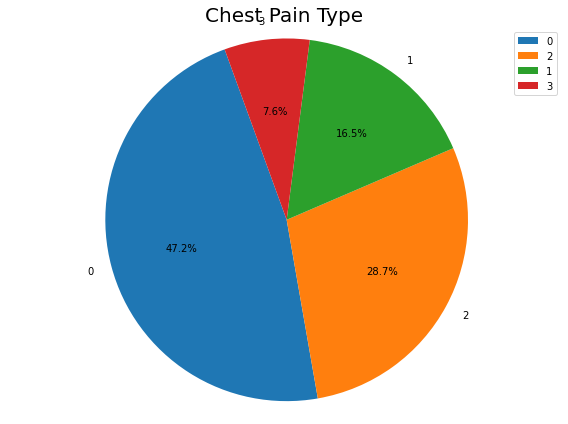

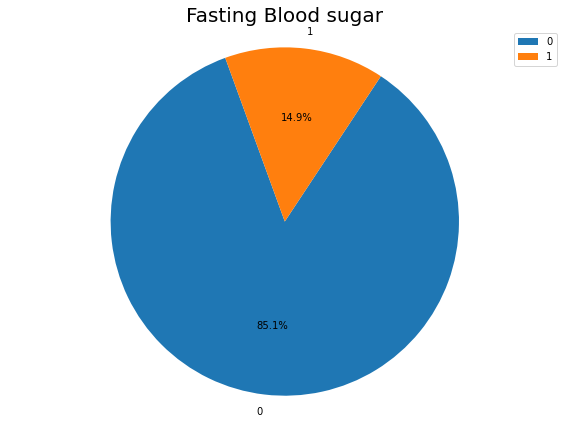

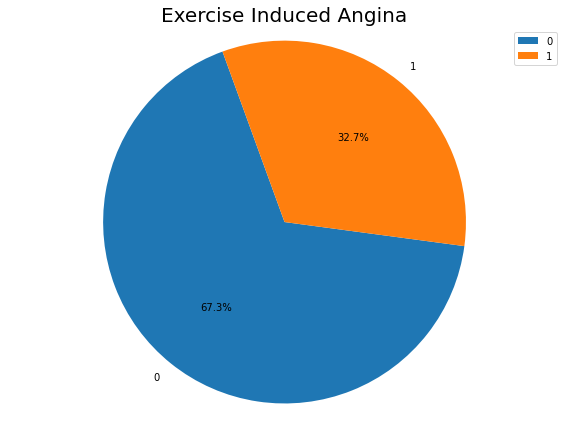

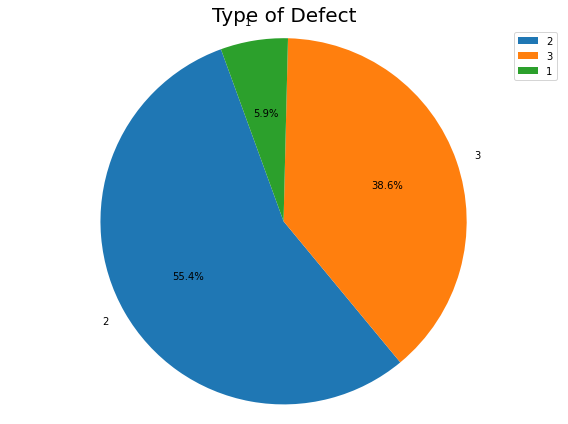

In [303]:
for i,z in list(zip(categoric_var, categoric_axis_name)):
    fig, ax = plt.subplots(figsize = (8,6))
    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())
    ax.pie(total_observation_values, labels = observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
    ax.axis("equal") 
    plt.title(z, fontsize = 20)
    plt.legend()
    plt.tight_layout()
    #plt.savefig("C:\\Users\\nadia\\Desktop\\magisterka\\exploratory_data_analysis\\Pie_chart\\"+z+"_categorical.pdf")
    plt.show()

#### Numerical Variables - Target Variable (Analysis with FaceGrid)

In [304]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [305]:
numeric_var.append('target')

In [306]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

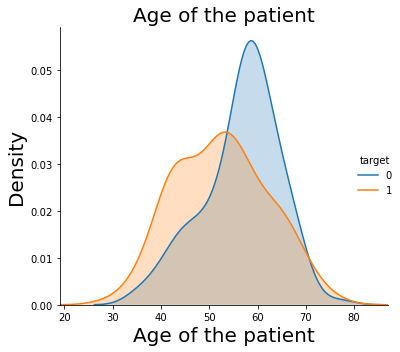

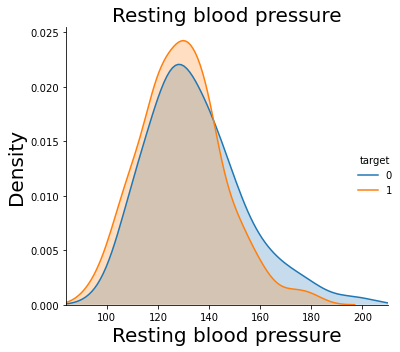

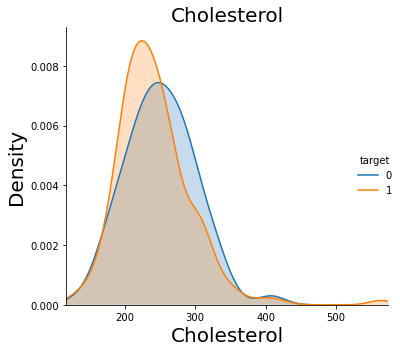

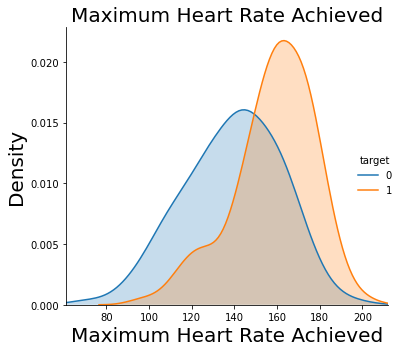

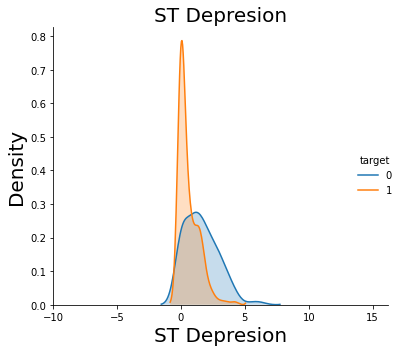

In [307]:
for i,z in list(zip(numeric_var, numeric_axis_name)):
    graph = sns.FacetGrid(df[numeric_var],hue = 'target',height = 5, xlim = ((df[i].min()-10), (df[i].max()+10)))
    graph.map(sns.kdeplot, i, shade = True)
    graph.add_legend()
    
    plt.title(z, fontsize = 20)
    plt.xlabel(z, fontsize = 20)
    plt.ylabel('Density', fontsize = 20)
    plt.tight_layout()
    #plt.savefig("C:\\Users\\nadia\\Desktop\\magisterka\\numerical_target\\" + z + ".pdf")
    plt.show()

# Graphs analysis

If the bumps are well separated and do not overlap, there's a correlation with the target 
If the bumps overlap too much , it means that the feature does not correlate well with the target because target is equally common at these values of the feature (POLSKI:Jeśli nierówności zachodzą na siebie zbyt mocno, oznacza to, że cecha nie jest dobrze skorelowana z celem, ponieważ cel występuje równie często przy tych wartościach cechy. )

## Age
The risk of heart attack increases with age. However, this graph tells us that we might be wrong about this. We can notice that number of people with heart attack risk decreases as age progresses. We take 55 years as a base, we can see that there's an increadible increase in the blue graph after the age of 55, but the blue graph means that there is no risk of heart attack. According to the data, the risk of getting a heart attack after the age 55 is leass than that of other ages. So, on the contrary, in the orange graph here, there is a decrease after the age of 55. So there is a decrease of heart attack risk after the age of 55.  To sum up, it  is just generally thought that older people may be more likely to have a heart attack. But from a graph of the age and target distribution, it is clear that this is not the case. 

## trtbps (resting blood pressure)
Now it is very difficult to predict wheter a patient will have a heart attack from resting blood pressure data and even specullated. We see that the two graphs are almost identical. For example, trtbps as value 130 is the maximum point for the two possibilities. Also the bumps in the graph overlap way too much.So this mean that the feature does not correlate well with the target variable and according to the graph, we could say that there is little correlation beteen the two variables. 
## Cholesterol 
We can say that the cholesterol value of 200 and 250 is quite risky for the patient. At the beginning of the graph patients with and without heart attack risk display pretty much a parallel image. While  the increase in the probability of having a heart attack from 180 to 250  is quite noticeable. Of course, after the value of 250 becomes pretty difficult to differentiate the probability of having a heart attack. 
## Thalach  (Maximum Heart Rate Achieved)
As a maximum reached heart rate increases, the probability of having a heart attack increases. There is a parallel increase in the two possibilities up to 150. However, after the value 150, patients with low probability of having a heart attack decrease all patients with a risk probability increase incredibly. 
## Oldpeak (ST Depression)
The oldpeak represented depression caused by steady wavelengths. And when we look at a graph, if the value of this variable is between zero and 1.5, this mean that there is a large increase in the probability of having a heart attack. So we can say that the range of 0 and 1.5 is a critical threshold for us.  


### Correlation 
A correlation is a statistical measure of the relation between two variables. The measure is used to in variables to demonstrate a linear relationship between each other. The correlation coefficient is a value that indicates the strength of the relationship between variables. The coefficient can take any values from -1 to 1. The interpretation is: 
* -1: Negative correlation: The variables move in opposite directions (when one variable increase, the other decreases)
* 0: no correlation: The variables do not have relationship 
* 1: Positive correlation: The variables move to the same direction (when one variable increases, the other variable increases)

### Categorical Variables - Target Variable (Analysis with Count Plot)

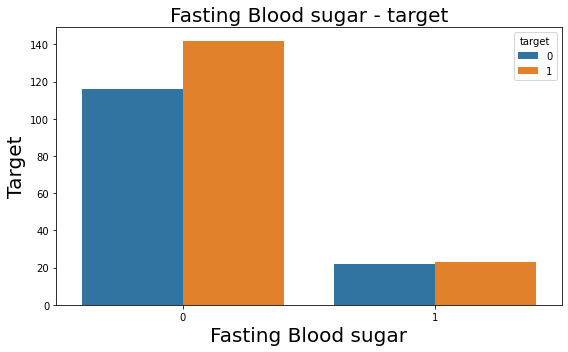

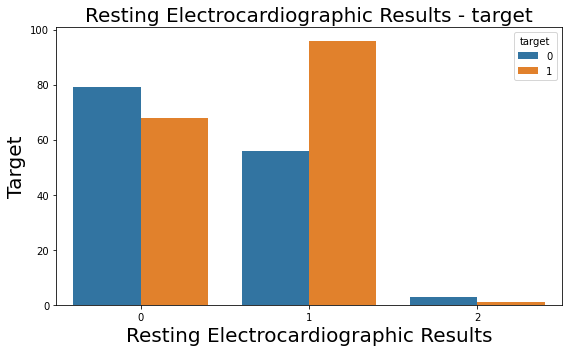

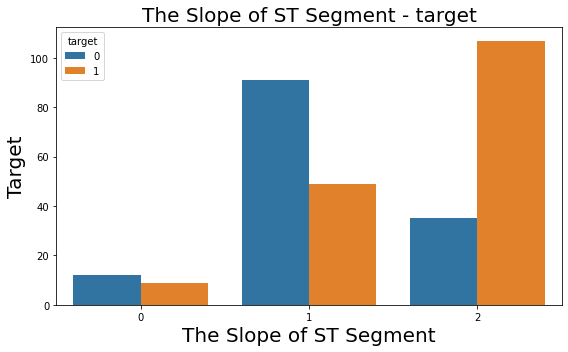

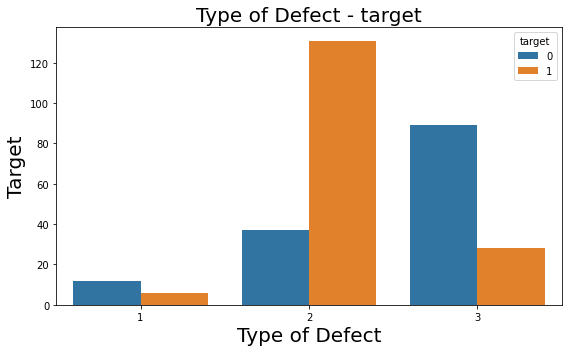

In [308]:
for i,z in list(zip(categoric_var, categoric_axis_name)):
    plt.figure(figsize = (8,5))
    sns.countplot(i, data = df[categoric_var], hue = 'target')
    
    plt.title(z + ' - target', fontsize = 20)
    plt.xlabel(z, fontsize = 20)
    plt.ylabel('Target', fontsize =20)
    plt.tight_layout()
    plt.savefig("C:\\Users\\nadia\\Desktop\\magisterka\\categorical_target\\" + z + ".pdf")
    plt.show()

## Analysis 
We have to examine the relationship between the sex variable and variable target. 
x axis are the observation units of the relevant variable. The bars in the graph are the color of the observation units of the target variable. So the blue ones are those who don't have any risk of heart attack. The orange symbolise the patients who have the risk of heart attack. 
### Sex 
 We can see that in woman group the are more women who have the risk of heart attack. There are almost more than half of those who do not have the risk. The situation is different for men (observation value 1). The blue colored bar has more observation values, so men are more likely to have heart attack than not to have. It is very intersesting how much gender could afect heart attack risk.
### CP
Now we examine the relationship of CP as our variable target. CP is the type of pain that has occurred in the patients chest. The first bar graph has zero observation value, that means that the paint occurs without any symptoms and obviously patients with this kinf of pain are less likely to have a heart attack. In the other three types of pain, the risk of having a heart ttack is almost three times higher than the risk of not having one. We can say that if a patient's CP variable is one, two or three, we could say taht the risk of heart attack is high. One typical angina is classic efort pain, it comes during any phisical activity. Two atypical angina is shortness of breath or non classic pain, three non angina and pain is non cardiac chest pain and this is the term used to describe chest pain that is not caused by any heart disease or heart attack. 
### FBS
FBS stands for fasting blood sugar. If the fasting blood sugar is less than 120 milligrams per deciliter, it appears as a zero on this table and if it is any more than that, it is marks as a one. Based on data the risk of heart attack is slightly higher in those with zero for their fasting blood sugar. In general, there are almost three times more patinets with zero than with one. If we look at the value of one, the situation seems somewhat equal. It means that it is a little difficult to say anything definite about heart attacks in patients with fasting blood sugar greater than 120. 
### rest_ecg 
Rest_ecg is the resting electrocardiogram results. This variable has three different values. One was abnormal, two was hypertrophy and zero was normal.
At the beginning we start from the value one. The probability of having a heart attack is almost twice more than the probability of not having the heart attack. We see that in the value of zero, in our interpretation it is normal, there is almost the same people with risk of heart attack and without this risk. There are were little patients who was classified as two. 
### exang 
This variable is abbreviation for exercise induced angina. The pain is represented by value 1 if it occurs with any exercise and zero when there is no pain. Analysis the graph we see that exercise does not effect heart attack. If patients have exercise related pain, the probability of not having a heart attack is higher. Unfortunatelly, patients who no not have exercise related pain are more likely to have a heart attack. This means that exercise related pain does not actually have much of a relaionship to a heart attack. 
### Slope
There are three observational values. Zero means it is downward sloping, one is flat and two is upward sloping. It is necessary to pay attention to patients with the slope variable of two, because the patients with an observational value of two are three times more likely to have heart attack than not to have one. When we analyse the graph we see that only pateints with value zero and one have more probability not to have a heart attack. 
### CA
CA is the number of large vessels colored with fluoroscopy. The group at risk is patietns with a zero observation. In this case the probability of having heart attack is three times higher than in the case of not having it. The values one, two and three shows the opposite situation. 

### Thal 
It has three values. Two is normal and three is defects that could be reversible. When we look to the graph, the value that draws our attention is a patients with value two. The observation value to these people are three times more likely to have a heart attack than those without this value. For the opposite values there is the opposite situation. 
### Target 
In general there are more patients with probability to have heart attack than those who have no risk. This is consistent with our pie chart, where 54.4% of the patients were at risk of having a heart attack and 45.5% of the patients had a chance of not having a heart attack. 

### Correlation  of categorical variables 

In [309]:
df[categoric_var].corr()

sex        cp       fbs  rest_ecg     exang    sloope  \
sex       1.000000 -0.049353  0.045032 -0.058196  0.141664 -0.030711   
cp       -0.049353  1.000000  0.094444  0.044421 -0.394280  0.119717   
fbs       0.045032  0.094444  1.000000 -0.084189  0.025665 -0.059894   
rest_ecg -0.058196  0.044421 -0.084189  1.000000 -0.070733  0.093045   
exang     0.141664 -0.394280  0.025665 -0.070733  1.000000 -0.257748   
sloope   -0.030711  0.119717 -0.059894  0.093045 -0.257748  1.000000   
thal      0.211652 -0.169125 -0.011209 -0.013795  0.225508 -0.106310   
target   -0.280937  0.433798 -0.028046  0.137230 -0.436757  0.345877   

              thal    target  
sex       0.211652 -0.280937  
cp       -0.169125  0.433798  
fbs      -0.011209 -0.028046  
rest_ecg -0.013795  0.137230  
exang     0.225508 -0.436757  
sloope   -0.106310  0.345877  
thal      1.000000 -0.363322  
target   -0.363322  1.000000

In [310]:
df[categoric_var].corr().iloc[:, [-1]] #correlation for the last column

target
sex      -0.280937
cp        0.433798
fbs      -0.028046
rest_ecg  0.137230
exang    -0.436757
sloope    0.345877
thal     -0.363322
target    1.000000

### Examining Numeric Variables Among Themselves (Analysis with Pair Plot)

In this section, we learn how to evaluate the relationship between numerical variables. We are going to draw by directional relationships for numeric columns across the entire frame. 

In [311]:
numeric_var 

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

In [312]:
numeric_var.remove('target')

In [313]:
df[numeric_var].head()

age  trtbps  chol  thalach  oldpeak
0   63     145   233      150      2.3
1   37     130   250      187      3.5
2   41     130   204      172      1.4
3   56     120   236      178      0.8
4   57     120   354      163      0.6

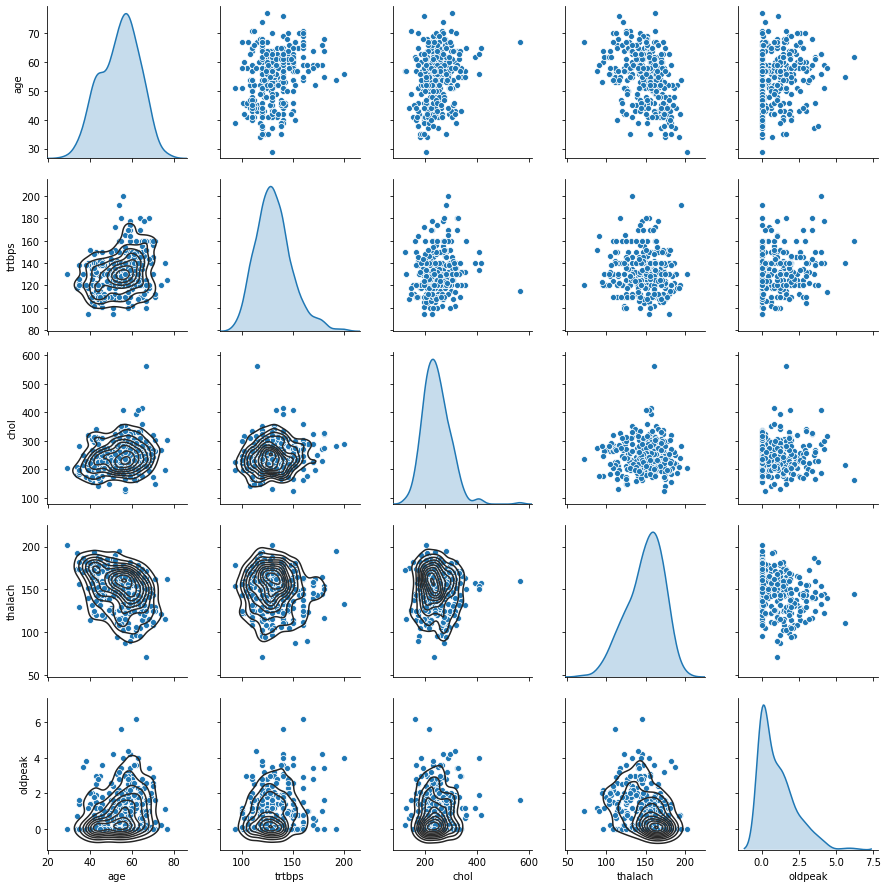

In [314]:
graph = sns.pairplot(df[numeric_var], diag_kind = 'kde')
graph.map_lower(sns.kdeplot, level = 4, color = '.2')
plt.show()

In [315]:
df.head()

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  sloope  \
0   63    1   3     145   233    1         0      150      0      2.3       0   
1   37    1   2     130   250    0         1      187      0      3.5       0   
2   41    0   1     130   204    0         0      172      0      1.4       2   
3   56    1   1     120   236    0         1      178      0      0.8       2   
4   57    0   0     120   354    0         1      163      1      0.6       2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [316]:
df = df.drop('ca', axis=1)

In [317]:
df.head()

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  sloope  \
0   63    1   3     145   233    1         0      150      0      2.3       0   
1   37    1   2     130   250    0         1      187      0      3.5       0   
2   41    0   1     130   204    0         0      172      0      1.4       2   
3   56    1   1     120   236    0         1      178      0      0.8       2   
4   57    0   0     120   354    0         1      163      1      0.6       2   

   thal  target  
0     1       1  
1     2       1  
2     2       1  
3     2       1  
4     2       1

In [318]:
plt.figure(figsize = (15,10))
sns.heatmap(data = df.corr(),cmap= "YlGnBu", annot = True,linewidths = 0.5)
#plt.savefig("C:\\Users\\nadia\\Desktop\\magisterka\\categorical_target\\" + "heatmap.pdf")#

<AxesSubplot:>

#### Interpretation 
(consider the x axis)

We can see a scatterplot of each numerical variable in the intersection region of the graph. This plots are shown in the Cortesian coordinates, thanks to this we can display the values of two variables. If a points are in the same direction and in a close relationship, we can say that there is a strong link between two variables. In positive directional relationships, there is a directly proportional relationship between two variables and the increase in one variable causes an increase in the other variable. In the negative relationships, there is also an inversely proportional relationship between the variables. It means that when the value of one variable decreases, the other variable also decreases. The variable that has the colsest relationship to the age variable is thalach variable. Lets notice that there is a collection of points extending towards the southwest direction. It means that there is a negative correlation, what is equal to the table above. However, since the pointss are somewhat scattered,, we could say that this correlation is moderate (POLISH: Ponieważ jednak rzuty punktów są nieco rozproszone, można powiedzieć, że korelacja ta jest umiarkowana). The other scatterplot on row name 'age' has positive correlation. However, since the points are slightly scattered, we can say that there is a low intensity correlation. To sum up, the strongest relationship with the age variable definitely is with 'thalach' variable. Now let's have a look to the 'trtbps' variable. We can say that relationship between 'trtbps' and other variable is very weak. However, among these variables, it has the highest correlation with our age variable and the lowest with the 'thalach' variables. We can see that the dots look incredibly messy, so there is no smooth distribution. Now we examine the cholesterol variable. The cholesterol variable seems to be the most related to the age and 'trtbps' variables. In conclusion we can say that when the age increases, so does cholesterol. Now we consider the 'thalach' variable. The strongest relationship with this variable is the 'age' variable. There appears to be a nagative moderate olerable relationship. There is no much of the correlation with the cholesterol variables, dots are actually too scattered. If we look to the 'oldpeak' variable, we can say that there is a pretty close relationship. Let's analys the last variable, the 'oldpeak'. When we examine the graphics, we might not be able to reach a clear result in the fullest sense because the relationship with all the variables is fairly similar to each other.  

In [319]:
plt.figure(figsize=(20,10))
sns.countplot(x=df["age"])
plt.title('Patients age count',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

# MACHINE LEARNING SECTION 

## Preparation of modeling 

### Dropping Columns with Low Correlation

At the begining we are going to remove the variables that have low correlation with the target variable from the dataset. We can read them from the heat map graph. We exclude this data because it will eaffect the sucess of our model. We are going to remove three variable from the dataset: 
* chol
* fbs
* rest_ecg

In [320]:
df.drop(["chol","fbs"], axis = 1, inplace = True)

In [321]:
df.head()

age  sex  cp  trtbps  rest_ecg  thalach  exang  oldpeak  sloope  thal  \
0   63    1   3     145         0      150      0      2.3       0     1   
1   37    1   2     130         1      187      0      3.5       0     2   
2   41    0   1     130         0      172      0      1.4       2     2   
3   56    1   1     120         1      178      0      0.8       2     2   
4   57    0   0     120         1      163      1      0.6       2     2   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

### Visualizing outliers

In [322]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (20,6))

ax1.boxplot(df['age'])
ax1.set_title('Age', fontsize = 20)

ax2.boxplot(df['trtbps'])
ax2.set_title('Resting blood pressure', fontsize = 20)

ax3.boxplot(df['thalach'])
ax3.set_title('Maximum heart rate', fontsize = 20)

ax4.boxplot(df['oldpeak'])
ax4.set_title('Ischemia caused by \n physical exercise', fontsize = 20)
#plt.savefig("C:\\Users\\nadia\\Desktop\\magisterka\\machine_learning\\"+"outliers.pdf")
plt.show()

In [323]:
from scipy import stats 
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

# IQR method

In [324]:
def iqr_method(data):
    Q1 = np.percentile(data, 25, interpolation = 'midpoint') 
    Q2 = np.percentile(data, 50, interpolation = 'midpoint')
    Q3 = np.percentile(data, 75, interpolation = 'midpoint')
    IQR = Q3-Q1
    low_lim = Q1 - 1.5*IQR
    up_lim = Q3 + 1.5*IQR
    without_outliers = []
    for x in data:
        if (x<=up_lim and x>=low_lim):
            without_outliers.append(x)
    return without_outliers
    

In [325]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5*diff)
    upper_v = q3 + (1.5*diff)
    return df[(df[var]<lower_v)| (df[var]>upper_v)]

In [326]:
trtbps_out = iqr(df, "trtbps")

In [327]:
trtbps_out

age  sex  cp  trtbps  rest_ecg  thalach  exang  oldpeak  sloope  thal  \
8     52    1   2     172         1      162      0      0.5       2     3   
101   59    1   3     178         0      145      0      4.2       0     3   
110   64    0   0     180         1      154      1      0.0       2     2   
203   68    1   2     180         0      150      1      1.6       1     3   
223   56    0   0     200         0      133      1      4.0       0     3   
241   59    0   0     174         1      143      1      0.0       1     2   
248   54    1   1     192         0      195      0      0.0       2     3   
260   66    0   0     178         1      165      1      1.0       1     3   
266   55    0   0     180         2      117      1      3.4       1     2   

     target  
8         1  
101       1  
110       1  
203       0  
223       0  
241       0  
248       0  
260       0  
266       0

In [328]:
df.drop([8,101,110,203,223,241,248,260,266], axis = 0, inplace = True)

In [329]:
thalach_out = iqr(df, "thalach")

In [330]:
thalach_out

age  sex  cp  trtbps  rest_ecg  thalach  exang  oldpeak  sloope  thal  \
272   67    1   0     120         1       71      0      1.0       1     2   

     target  
272       0

In [331]:
df.drop([272], axis = 0, inplace = True)

In [332]:
oldpeak_out = iqr(df, "oldpeak")

In [333]:
oldpeak_out

age  sex  cp  trtbps  rest_ecg  thalach  exang  oldpeak  sloope  thal  \
204   62    0   0     160         0      145      0      6.2       0     3   
221   55    1   0     140         1      111      1      5.6       0     3   
250   51    1   0     140         1      122      1      4.2       1     3   
291   58    1   0     114         2      140      0      4.4       0     1   

     target  
204       0  
221       0  
250       0  
291       0

In [334]:
df.drop([204,221,250,291], axis = 0, inplace = True)

In [335]:
iqr_trtbps = iqr_method(df['trtbps'])

In [336]:
iqr_thalach = iqr_method(df['thalach'])

In [337]:
iqr_oldpeak = iqr_method(df['oldpeak'])

In [338]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,6))

ax1.boxplot(df['trtbps'])
ax1.set_title('Resting blood pressure', fontsize = 20)

ax2.boxplot(df['thalach'])
ax2.set_title('Maximum heart rate', fontsize = 20)

ax3.boxplot(df['oldpeak'])
ax3.set_title('Ischemia caused by \n physical exercise', fontsize = 20)

#plt.savefig("C:\\Users\\nadia\\Desktop\\magisterka\\machine_learning\\"+"without_outliers.pdf")
plt.show()

## Data skewness

In [339]:
df.head()

age  sex  cp  trtbps  rest_ecg  thalach  exang  oldpeak  sloope  thal  \
0   63    1   3     145         0      150      0      2.3       0     1   
1   37    1   2     130         1      187      0      3.5       0     2   
2   41    0   1     130         0      172      0      1.4       2     2   
3   56    1   1     120         1      178      0      0.8       2     2   
4   57    0   0     120         1      163      1      0.6       2     2   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

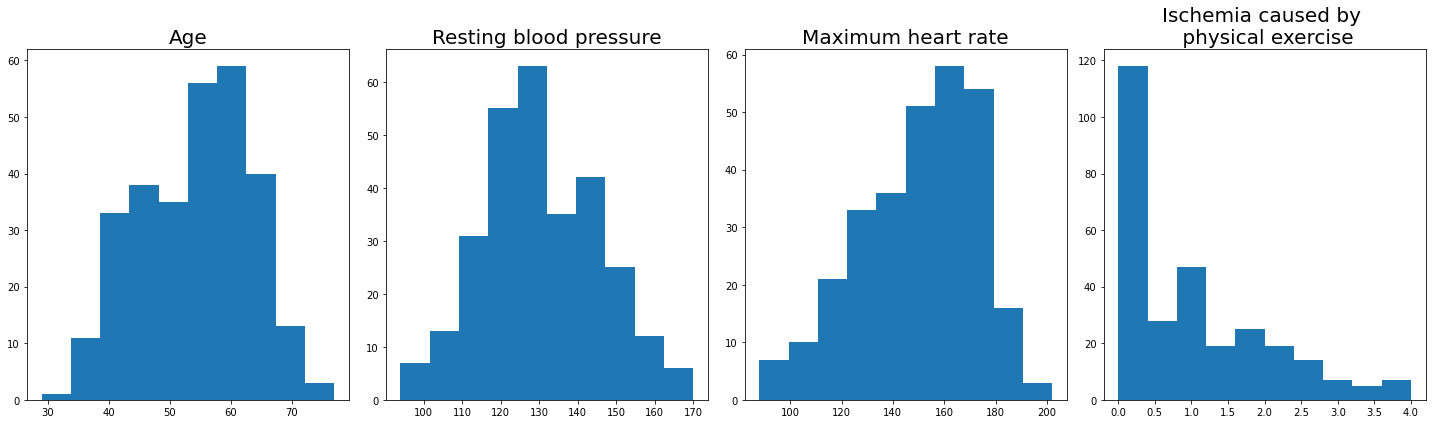

In [340]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (20,6))

ax1.hist(df['age'])
ax1.set_title('Age', fontsize = 20)

ax2.hist(df['trtbps'])
ax2.set_title('Resting blood pressure', fontsize = 20)

ax3.hist(df['thalach'])
ax3.set_title('Maximum heart rate', fontsize = 20)

ax4.hist(df['oldpeak'])
ax4.set_title('Ischemia caused by \n physical exercise', fontsize = 20)
plt.tight_layout()
#plt.savefig("C:\\Users\\nadia\\Desktop\\magisterka\\machine_learning\\"+"skewed.pdf")

plt.show()

All of the graphs does not show normal distribution. The last two of them are skewed. 

In [341]:
# try to show the skewness variable 
df[["age","trtbps","thalach","oldpeak"]].agg(["skew"]).transpose() 

skew
age     -0.167525
trtbps   0.238213
thalach -0.504351
oldpeak  0.933839

We want our data to have symmetrical distribution before we put it in a machine learning, so we will try to put that last variable into a symetrical shape, and that is we are going to try to make it look like a normal distribution.  

### Transformation Operations on Unsemmetrical Data 

In [342]:
df["oldpeak_log"] = np.log(df["oldpeak"])
df["oldpeak_sqrt"] = np.sqrt(df["oldpeak"])

In [343]:
df.head()

age  sex  cp  trtbps  rest_ecg  thalach  exang  oldpeak  sloope  thal  \
0   63    1   3     145         0      150      0      2.3       0     1   
1   37    1   2     130         1      187      0      3.5       0     2   
2   41    0   1     130         0      172      0      1.4       2     2   
3   56    1   1     120         1      178      0      0.8       2     2   
4   57    0   0     120         1      163      1      0.6       2     2   

   target  oldpeak_log  oldpeak_sqrt  
0       1     0.832909      1.516575  
1       1     1.252763      1.870829  
2       1     0.336472      1.183216  
3       1    -0.223144      0.894427  
4       1    -0.510826      0.774597

In [344]:
df[["oldpeak", "oldpeak_log", "oldpeak_sqrt"]].agg(["skew"]).transpose()
# we see that there is no skewness value in the oldpeak_winsorize_log data
# If the skeeness value is between -0.5 and +0.5, the variable is symmetrical 

skew
oldpeak       0.933839
oldpeak_log        NaN
oldpeak_sqrt  0.083956

In [345]:
df.drop(["oldpeak","oldpeak_log"], axis = 1, inplace  = True)

In [346]:
df.head()

age  sex  cp  trtbps  rest_ecg  thalach  exang  sloope  thal  target  \
0   63    1   3     145         0      150      0       0     1       1   
1   37    1   2     130         1      187      0       0     2       1   
2   41    0   1     130         0      172      0       2     2       1   
3   56    1   1     120         1      178      0       2     2       1   
4   57    0   0     120         1      163      1       2     2       1   

   oldpeak_sqrt  
0      1.516575  
1      1.870829  
2      1.183216  
3      0.894427  
4      0.774597

### Applying One Hot Encoding Method to Categoorical Variables 

Now we wanted to opeate on our categorical variables because machine learning algorithms do not work directly on categorical data. It means that our data need to be converted into numerical data. The method we will use is called One Hot Encoding. 
One Hot Encoding method is a process of converting variables to a kind of binary system. As we know the categorical variables can cosist of different values. We will set each of the observation values to be a column in the dataset. 

In [347]:
df_copy = df.copy()

In [348]:
df_copy.head()

age  sex  cp  trtbps  rest_ecg  thalach  exang  sloope  thal  target  \
0   63    1   3     145         0      150      0       0     1       1   
1   37    1   2     130         1      187      0       0     2       1   
2   41    0   1     130         0      172      0       2     2       1   
3   56    1   1     120         1      178      0       2     2       1   
4   57    0   0     120         1      163      1       2     2       1   

   oldpeak_sqrt  
0      1.516575  
1      1.870829  
2      1.183216  
3      0.894427  
4      0.774597

In [349]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'sloope', 'thal', 'target']

In [350]:
categoric_var.remove("fbs")
#categoric_var.remove("rest_ecg")

In [351]:
categoric_var 

['sex', 'cp', 'rest_ecg', 'exang', 'sloope', 'thal', 'target']

In [352]:
df_copy = pd.get_dummies(df_copy, columns = categoric_var[:-1], drop_first = True)

In [353]:
df_copy.head()

age  trtbps  thalach  target  oldpeak_sqrt  sex_1  cp_1  cp_2  cp_3  \
0   63     145      150       1      1.516575      1     0     0     1   
1   37     130      187       1      1.870829      1     0     1     0   
2   41     130      172       1      1.183216      0     1     0     0   
3   56     120      178       1      0.894427      1     1     0     0   
4   57     120      163       1      0.774597      0     0     0     0   

   rest_ecg_1  rest_ecg_2  exang_1  sloope_1  sloope_2  thal_2  thal_3  
0           0           0        0         0         0       0       0  
1           1           0        0         0         0       1       0  
2           0           0        0         0         1       1       0  
3           1           0        0         0         1       1       0  
4           1           0        1         0         1       1       0

### Separating Data into Test and Training Set 

In [354]:
from sklearn.model_selection import train_test_split

In [355]:
x = df_copy.drop(['target'], axis = 1)
y = df_copy[['target']]

In [356]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 3) #random_state = 3, every time the same result 

In [357]:
print(f'x_train, {x_train.shape[0]}')
print(f'x_test, {x_test.shape[0]}')
print(f'y_train, {y_train.shape[0]}')
print(f'y_test, {y_test.shape[0]}')

x_train, 260
x_test, 29
y_train, 260
y_test, 29


# Modelling 

## Logistic Regression Algorithm 

In [358]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [359]:
#Logistic Regresion object 
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [360]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [361]:
y_pred = log_reg.predict(x_test)

In [362]:
y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [363]:
accurancy = accuracy_score(y_test, y_pred)
print('Test accurancy:{}'.format(accurancy))

Test accurancy:0.8620689655172413


There are two cases in machine learning literature. Underfitting and overfitting. 
When we have underfitting it means that it is not actually grasped the underlying logic of the data. The model does not know what to do with this data, so it gives inaccurate results. When the model is overfitting, it will overfit the dataset and misses the actual case. In short, the model memorize the data while it is training and if it encounters any data actually. 
When we look at our logistic regression model we see that the accurancy, we have reached is 86%. It means that there is no under fitting, the model looks well trained.  

### Roc Curve and Area Under Curve(AUC)

We want to measure our model performance. We will check the ROC curve and the area under the curve. If the line is away from the "random classifier" curve the model is better if it gets closer to the dash line then the model performance decreases. The value in y axis is called "True Positive Rate" in the short TPR. In our analysis this value is the rate of detecting people who are likely to have a heart attack. In the x axis there is "False Positive Rate" in short FPR. This is the rate at which we make an incorrect prediction for people who are not at risk of heart attack. So it means that it is the rate which we make an incorrect prediction for people who are not at risk of heart attack. AUC is the "Area Under the ROC Curve", it tells how well the model can distinguish the classes.  
AUC values according to the evaluation and the interpretation:

0.9-1.0 ------- EXCELLENT
0.8-0.9 ------- VERY GOOD 
0.7-0.8 ------- GOOD
0.6-0.7 ------- SATISFACTORY
0.5-0.6 ------- UNSATISFACTORY

We use try ROC Curve and AUC because it is not enough to measure model sucess with only the accuracy metric and datasets that are not evenly distributed. 


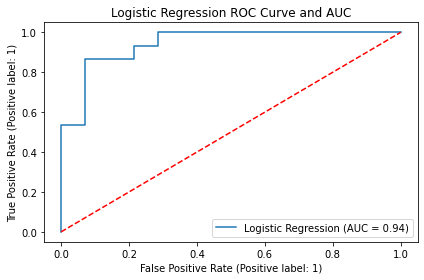

In [364]:
plot_roc_curve(log_reg, x_test, y_test, name = 'Logistic Regression')
plt.title('Logistic Regression ROC Curve and AUC')
plt.plot([0,1], [0,1], "r--")
plt.tight_layout()
#plt.savefig("C:\\Users\\nadia\\Desktop\\magisterka\\machine_learning\\"+"AUC_log_regression.pdf")
plt.show()

## Cross Validation 

In simply words in Cross Validation method, we run the model on data it has never seen. So we get a reliable result when we take the average of the latest model results. In general, if the result is much lower than the result that you first found it, it means that the model we train first has some overfitting. In other words, the model memorize the data. However, if it is close to each other, we can say that we have confirmed the  accuracy of the model. 

In [365]:
scores = cross_val_score(log_reg,x_test, y_test, cv = 10)
print("Cross Validation Accurancy Score", scores.mean())

Cross Validation Accurancy Score 0.7333333333333333


### Decision Tree Algorithm 

In [366]:
from sklearn.tree import DecisionTreeClassifier

Decision Tree classification is a model that creates a model in the form of a tree structure consisting of decision nodes and leaf nodes according to features and targets.  

In [367]:
dec_tree = DecisionTreeClassifier(random_state = 5)

In [368]:
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=5)

In [369]:
y_pred = dec_tree.predict(x_test)

In [370]:
accuracy = accuracy_score(y_test, y_pred)

In [371]:
print("The test accuracy score of Decision Tree is: {}".format(accuracy))

The test accuracy score of Decision Tree is: 0.7931034482758621


We get the lower accurancy than in the regresion model. But let look on the cross validation value. 

In [372]:
scores = cross_val_score(dec_tree,x_test, y_test, cv = 10)
print("Cross Validation Accurancy Score", scores.mean())

Cross Validation Accurancy Score 0.7


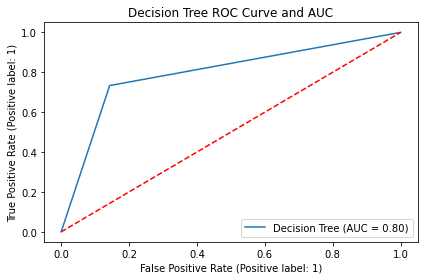

In [373]:
plot_roc_curve(dec_tree, x_test, y_test, name = 'Decision Tree')
plt.title('Decision Tree ROC Curve and AUC')
plt.plot([0,1], [0,1], "r--")
plt.tight_layout()
#plt.savefig("C:\\Users\\nadia\\Desktop\\magisterka\\machine_learning\\"+"AUC_decision_tree.pdf")
plt.show()

### Support Vector Machine Algorithm 

In [374]:
from sklearn.svm import SVC

In [375]:
svc_model = SVC(random_state = 5)

In [376]:
svc_model.fit(x_train, y_train)

SVC(random_state=5)

In [377]:
y_pred = svc_model.predict(x_test)

In [378]:
accuracy = accuracy_score(y_test, y_pred)

In [379]:
print("The test accuracy score of Support Vector Machine is: {}".format(accuracy))

The test accuracy score of Support Vector Machine is: 0.5862068965517241


In [380]:
scores = cross_val_score(svc_model,x_test, y_test, cv = 10)
print("Cross Validation Accurancy Score", scores.mean())

Cross Validation Accurancy Score 0.5166666666666666


We see that the cross validation accurancy is 0.83 and accurancy is 0.87, so there is a little overfitting situation. 

In [381]:
plot_roc_curve(svc_model, x_test, y_test, name = 'Support Vector Machine')
plt.title('Support vector Machine ROC Curve and AUC')
plt.plot([0,1], [0,1], "r--")
plt.tight_layout()
#plt.savefig("C:\\Users\\nadia\\Desktop\\magisterka\\machine_learning\\"+"AUC_SVM.pdf")
plt.show()

We get a very good result, better than using logistic regression model. But it doesn't mean that we are going to prefer using this SVC model as a final model, because the model performance is better in logistic regression.  

###  Random Forest Algorithm

In [382]:
from sklearn.ensemble import RandomForestClassifier

In [383]:
random_forest = RandomForestClassifier(random_state = 5)

In [384]:
random_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=5)

In [385]:
y_pred = random_forest.predict(x_test)

In [386]:
accuracy = accuracy_score(y_test, y_pred)
print("The test accuracy score of Random Forest Algorithm is: {}".format(accuracy))

The test accuracy score of Random Forest Algorithm is: 0.8275862068965517


In [387]:
scores = cross_val_score(random_forest,x_test, y_test, cv = 10)
print("Cross-Validation Random Forest Accurancy Score", scores.mean())

Cross-Validation Random Forest Accurancy Score 0.7666666666666666


In [388]:
plot_roc_curve(random_forest, x_test, y_test, name = 'Random Forest')
plt.title('Random Forest ROC Curve and AUC')
plt.plot([0,1], [0,1], "r--")
plt.tight_layout()
#plt.savefig("C:\\Users\\nadia\\Desktop\\magisterka\\machine_learning\\"+"AUC_random_forest.pdf")
plt.show()

When we look at the accuracy value with cross-validation, looks to be about 90%. This means that our model actually gives this average result when it sees ten different training and test dataset. So there may be a little under fitting in this model. We will fix that problem by setting the hyperparameter. 

### Hyperparameter Optimization (with GridSearchCV)

In [389]:
random_forest_new = RandomForestClassifier(random_state = 5)
random_forest_new

RandomForestClassifier(random_state=5)

In [390]:
parameters = {'n_estimators':[50,100,150,200], #how many trees will be in forest
             'criterion': ['gini','entropy'], #function of measuring the quality when splitting decision trees 
             'max_features':['auto','sqrt','log2'], #the number of features to consider when searching for the best split
             'bootstrap':[True, False]} #where the bootstrap instances are used when creating the tree. 

In [391]:
random_forest_grid = GridSearchCV(random_forest_new, param_grid = parameters)

In [392]:
random_forest_grid.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=5),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [393]:
print("Best Parameters: ", random_forest_grid.best_params_)

Best Parameters:  {'bootstrap': True, 'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 150}


In [394]:
random_forest_new2 =  RandomForestClassifier(bootstrap = True, criterion = 'entropy', max_features = 'auto',n_estimators = 200, random_state = 5)

In [395]:
random_forest_new2.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=5)

In [396]:
y_pred = random_forest_new2.predict(x_test)

In [397]:
accuracy = accuracy_score(y_test, y_pred)
print("The test accuracy score of Random Forest Algorithm after hyper-parameter turning is: {}".format(accuracy))

The test accuracy score of Random Forest Algorithm after hyper-parameter turning is: 0.8620689655172413


In [398]:
plot_roc_curve(random_forest_new2, x_test, y_test, name = 'Random Forest')
plt.title('Random Forest ROC Curve and AUC')
plt.plot([0,1], [0,1], "r--")
plt.show()

### Gradient Boosting Algorithm 

In [399]:
from sklearn.ensemble import GradientBoostingClassifier

In [400]:
gradient_boosting = GradientBoostingClassifier(random_state = 5)

In [401]:
gradient_boosting.fit(x_train, y_train)

GradientBoostingClassifier(random_state=5)

In [402]:
y_pred = gradient_boosting.predict(x_test)

In [403]:
accuracy = accuracy_score(y_test, y_pred)
print("The test accuracy score of Gradient Boosting Algorithm is: {}".format(accuracy))

The test accuracy score of Gradient Boosting Algorithm is: 0.7931034482758621


In [404]:
scores = cross_val_score(gradient_boosting,x_test, y_test, cv = 10)
print("Cross-Validation Accurancy Score", scores.mean())

Cross-Validation Accurancy Score 0.7666666666666667


In [405]:
plot_roc_curve(gradient_boosting, x_test, y_test, name = 'Gradient Boosting')
plt.title('Gradient Boosting ROC Curve and AUC')
plt.plot([0,1], [0,1], "r--")
plt.tight_layout()
#plt.savefig("C:\\Users\\nadia\\Desktop\\magisterka\\machine_learning\\"+"AUC_gradient_boosting.pdf")
plt.show()

## Linear Regression 

In [406]:
from sklearn.linear_model import LinearRegression

In [407]:
regressor = LinearRegression()
regressor

LinearRegression()

In [408]:
regressor.fit(x_train, y_train)

LinearRegression()

In [409]:
print(regressor.intercept_) #b

[0.6060861]


In [410]:
print(regressor.coef_) #coefficient of x

[[-0.00314415 -0.00104683  0.00203989 -0.09609726 -0.17614219  0.18991485
   0.24146044  0.25953623  0.08197207  0.10470284 -0.10470613 -0.08811481
   0.02566037  0.14462051 -0.09941304]]


In [411]:
y_pred = regressor.predict(x_test)
y_pred = y_pred.round() 

In [412]:
accurancy = accuracy_score(y_test, y_pred)
print('Test accurancy:{}'.format(accurancy))

Test accurancy:0.8620689655172413


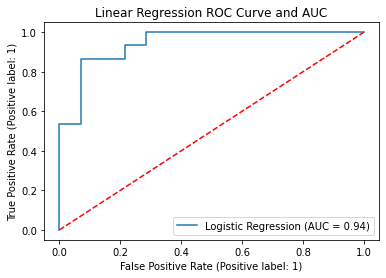

In [413]:
plot_roc_curve(log_reg, x_test, y_test, name = 'Logistic Regression')
plt.title('Linear Regression ROC Curve and AUC')
plt.plot([0,1], [0,1], "r--")
#plt.savefig("C:\\Users\\nadia\\Desktop\\magisterka\\machine_learning\\"+"AUC_linear_regression.pdf")
plt.show()

In [414]:
scores = cross_val_score(regressor,x_test, y_test, cv = 10, scoring='r2')
print("Cross Validation Accurancy Score", np.abs(scores.mean()))

Cross Validation Accurancy Score 0.7351798993859312
